Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
Delivery_time -> Predict delivery time using sorting time 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
data=pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
#EDA and Data Visualization
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data.shape

(21, 2)

In [6]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
data.dropna()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


{'whiskers': [<matplotlib.lines.Line2D at 0x24b01250c10>,
 'caps': [<matplotlib.lines.Line2D at 0x24b011ec310>,
 'boxes': [<matplotlib.lines.Line2D at 0x24b01243d90>],
 'medians': [<matplotlib.lines.Line2D at 0x24b01253d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x24b0125c810>],
 'means': []}

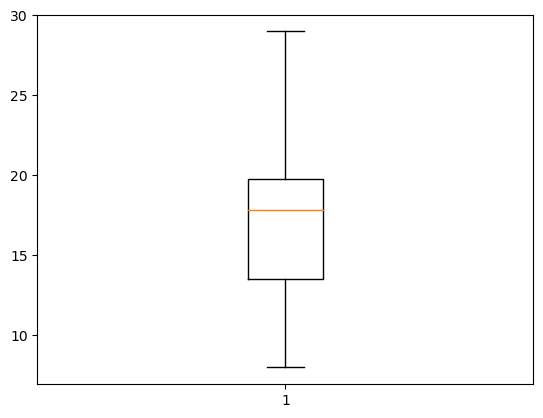

In [9]:
plt.boxplot(data['Delivery Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24b0121a4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24b011e6390>,
 'boxes': [<matplotlib.lines.Line2D at 0x24b01a71550>],
 'medians': [<matplotlib.lines.Line2D at 0x24b01a78f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x24b01a797d0>],
 'means': []}

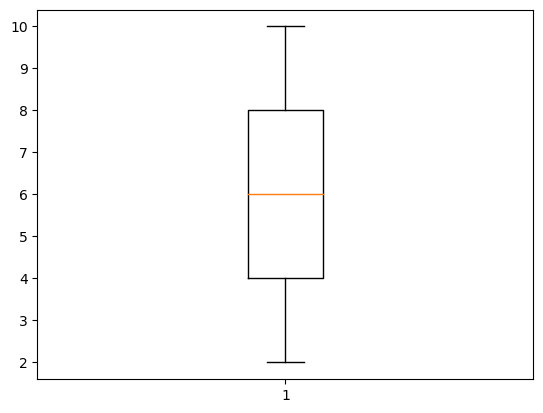

In [10]:
plt.boxplot(data['Sorting Time'])

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_16660\2217253749.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

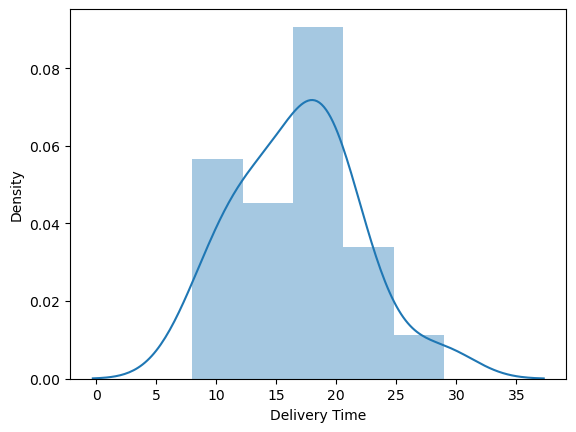

In [12]:
sns.distplot(data['Delivery Time'])

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_16660\3932129489.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

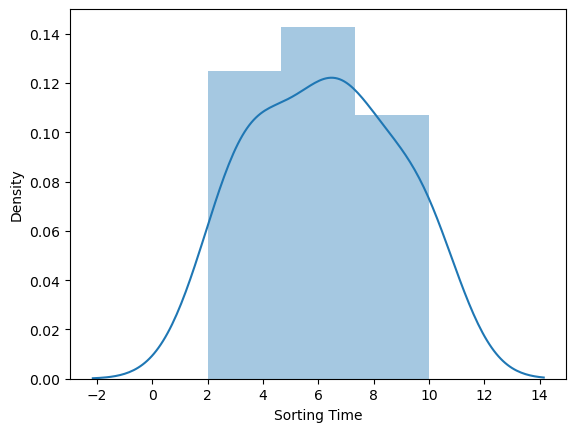

In [13]:
sns.distplot(data['Sorting Time'])

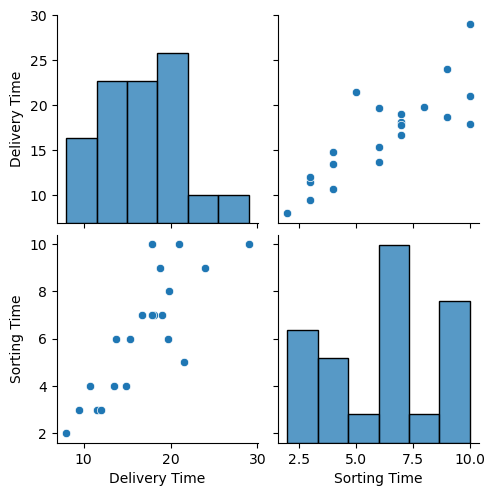

In [14]:
sns.pairplot(data)

In [15]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data                          #Rename function

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [16]:
data.corr()           #Correlation Analysis

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

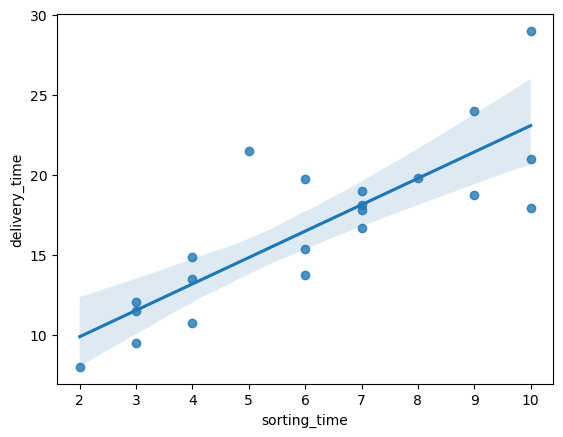

In [17]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [18]:
#Model Building
import statsmodels.formula.api as smf
model1 = smf.ols("delivery_time~sorting_time",data = data).fit()
print(model1.params,'\n''\n',model1.tvalues,'\n''\n', model1.pvalues)    

Intercept       6.582734
sorting_time    1.649020
dtype: float64 

 Intercept       3.823349
sorting_time    6.387447
dtype: float64 

 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [19]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [20]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        20:15:21   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model2 = smf.ols("np.log(delivery_time)~np.log(sorting_time)",data = data).fit()  #using log

In [22]:
print(model2.params,'\n''\n',model2.tvalues,'\n''\n', model2.pvalues)    

Intercept               1.741987
np.log(sorting_time)    0.597522
dtype: float64 

 Intercept               13.085552
np.log(sorting_time)     8.024484
dtype: float64 

 Intercept               5.921137e-11
np.log(sorting_time)    1.601539e-07
dtype: float64


In [23]:
#R squared values
(model2.rsquared,model2.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [24]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 19 Jan 2024   Prob (F-statistic):           1.60e-07
Time:                           20:15:49   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model3 = smf.ols("delivery_time~np.square(sorting_time)",data = data).fit()    #using square
print(model3.params,'\n''\n',model3.tvalues,'\n''\n', model3.pvalues)    

Intercept                  11.237205
np.square(sorting_time)     0.124870
dtype: float64 

 Intercept                  9.398601
np.square(sorting_time)    5.691330
dtype: float64 

 Intercept                  1.415704e-08
np.square(sorting_time)    1.739194e-05
dtype: float64


In [26]:
#R squared values
(model3.rsquared,model3.rsquared_adj)

(0.6302871815826637, 0.6108286121922777)

In [27]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           1.74e-05
Time:                        20:16:21   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  11.2372      1.196      9.399      0.000       8.735      13.740
np.square(sorting_time)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model4 = smf.ols("delivery_time~np.sqrt(sorting_time)",data = data).fit()  #using square root
print(model4.params,'\n''\n',model4.tvalues,'\n''\n', model4.pvalues)    

Intercept               -2.518837
np.sqrt(sorting_time)    7.936591
dtype: float64 

 Intercept               -0.840911
np.sqrt(sorting_time)    6.592434
dtype: float64 

 Intercept                0.410857
np.sqrt(sorting_time)    0.000003
dtype: float64


In [29]:
#R squared values
(model4.rsquared,model4.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

In [30]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           2.61e-06
Time:                        20:16:54   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(sorting_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""